In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import boxcox
pd.set_option('display.max_columns', None)
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,cross_val_score, KFold,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [45]:
df = pd.read_csv('Breast_Cancer.csv')
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [47]:
df[df.duplicated(keep=False)]

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
213,63,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,9,1,56,Alive
436,63,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,9,1,56,Alive


In [48]:
df.drop_duplicates(inplace=True)

In [49]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4023.000,4023.000,4023.000,4023.000,4023.000
mean,53.970,30.477,14.358,4.159,71.302
std,8.963,21.121,8.100,5.110,22.923
min,30.000,1.000,1.000,1.000,1.000
25%,47.000,16.000,9.000,1.000,56.000
50%,54.000,25.000,14.000,2.000,73.000
75%,61.000,38.000,19.000,5.000,90.000
max,69.000,140.000,61.000,46.000,107.000


In [50]:
numerical = df.select_dtypes(include='number')
numerical

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,68,4,24,1,60
1,50,35,14,5,62
2,58,63,14,7,75
3,58,18,2,1,84
4,47,41,3,1,50
...,...,...,...,...,...
4019,62,9,1,1,49
4020,56,46,14,8,69
4021,68,22,11,3,69
4022,58,44,11,1,72


In [51]:
categorical = df.select_dtypes(include='object')
categorical

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
0,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,Alive
1,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
2,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,Positive,Positive,Alive
3,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,Alive
4,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,Positive,Positive,Alive
...,...,...,...,...,...,...,...,...,...,...,...
4019,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
4020,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
4021,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,Positive,Negative,Alive
4022,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,Positive,Positive,Alive


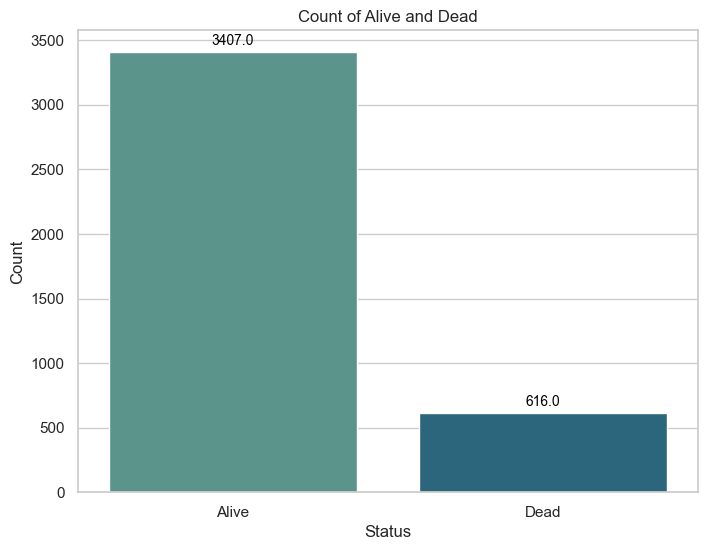

In [52]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Status', data=df, hue='Status', palette='crest', dodge=False, legend=False)

# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Count of Alive and Dead')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

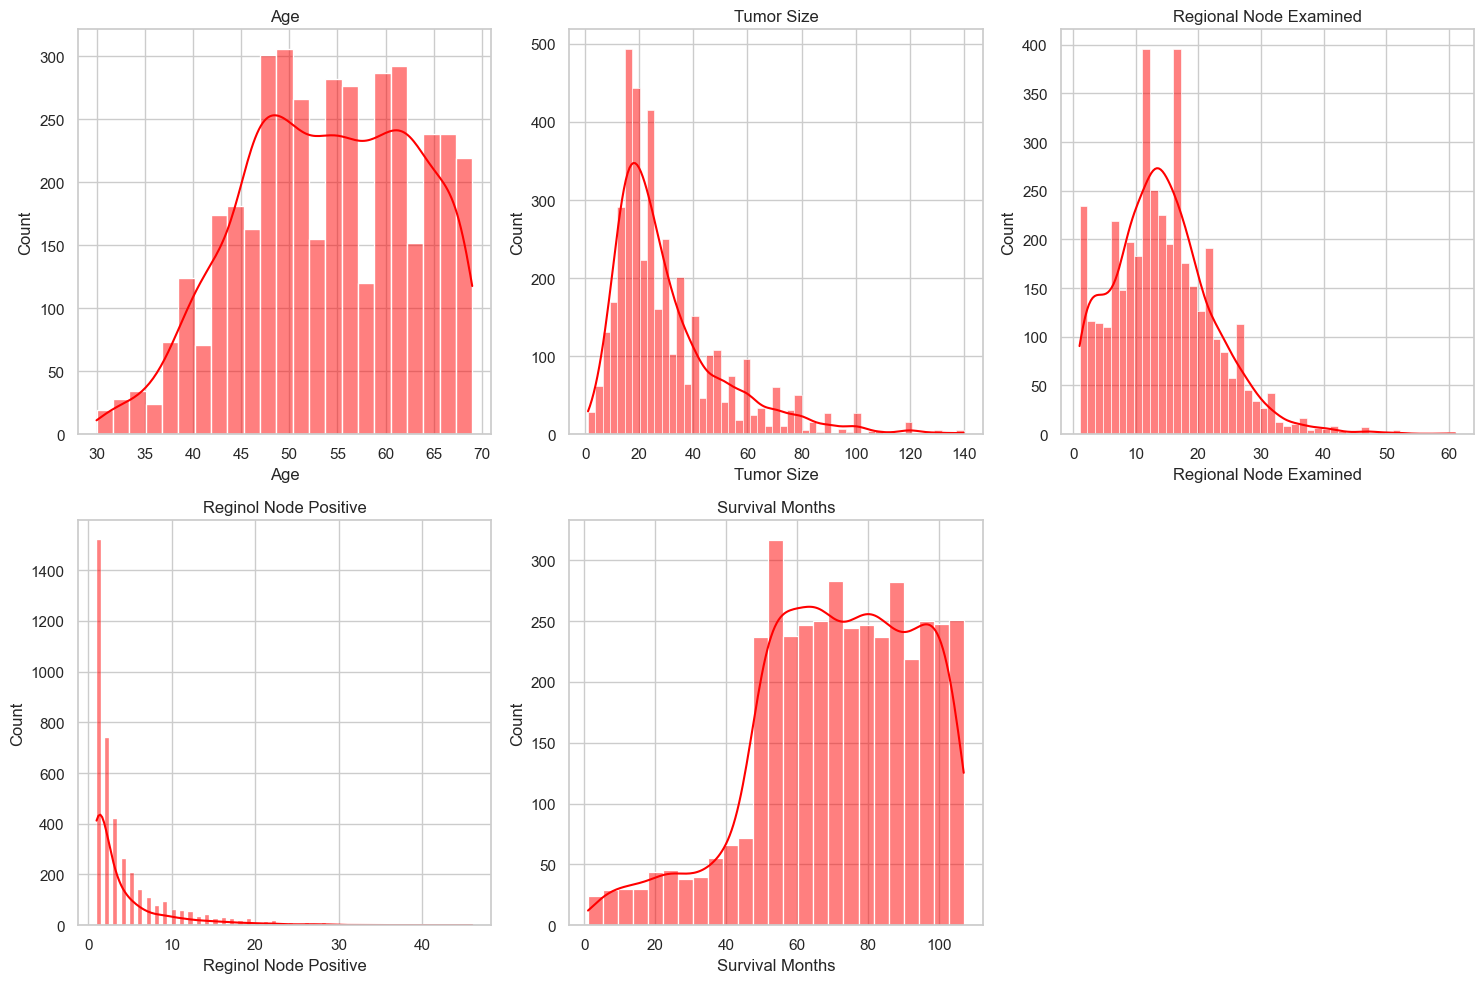

In [53]:
# numerical.hist(bins=30, figsize=(15, 10))
# plt.show()
# sns.histplot(data = df, x = 'Age', kde = True, color = 'red')



fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(numerical.columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color = 'red')
    axes[i].set_title(col)

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [54]:
numerical.skew()


Age                      -0.220
Tumor Size                1.739
Regional Node Examined    0.829
Reginol Node Positive     2.702
Survival Months          -0.590
dtype: float64

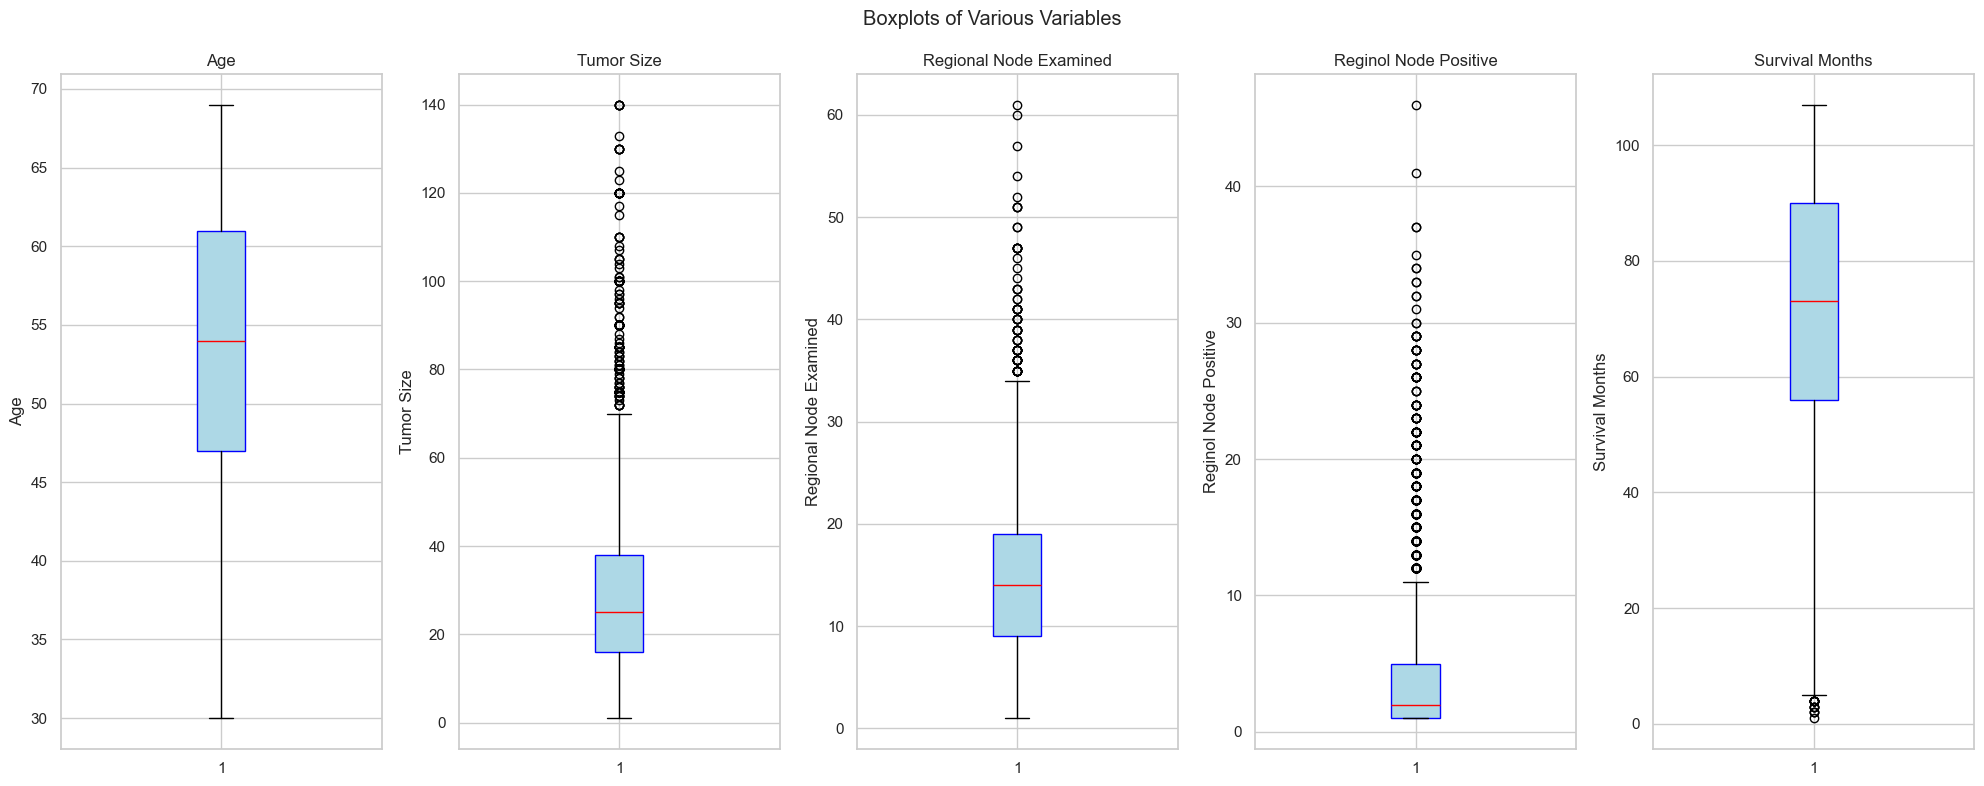

In [55]:
# variables = ['Age', 'Regional Node Examined', 'Survival Months', 
#              'Tumor Size', 'Regional Node Positive']
fig, axes = plt.subplots(nrows=1, ncols=len(numerical.columns), figsize=(20, 8))

for i, var in enumerate(numerical.columns):
    axes[i].boxplot(df[var], patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'),
                    medianprops=dict(color='red'))
    axes[i].set_title(var)
    axes[i].set_ylabel(var)

fig.suptitle('Boxplots of Various Variables')
plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

In [56]:
for col in numerical.columns:
    if abs(df[col].skew()) > .6:
        # df[f'{col}_log_transformed'] = np.log1p(df[col])
        # numerical[f'{col}_log_transformed'] = np.log1p(numerical[col])
        df[f'{col}_boxcox_transformed'], _ = boxcox(df[col])
        numerical[f'{col}_boxcox_transformed'],_ = boxcox(numerical[col])
        numerical = numerical.drop(col, axis = 1)
        df = df.drop(col, axis = 1)

In [57]:
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Survival Months,Status,Tumor Size_boxcox_transformed,Regional Node Examined_boxcox_transformed,Reginol Node Positive_boxcox_transformed
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,60,Alive,1.495,9.072,0.000
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,Positive,Positive,62,Alive,4.330,6.191,1.142
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,Positive,Positive,75,Alive,5.220,6.191,1.292
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,84,Alive,3.390,0.852,0.000
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,Positive,Positive,50,Alive,4.564,1.532,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,Positive,Positive,49,Alive,2.478,0.000,0.000
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,Positive,Positive,69,Alive,4.737,6.191,1.345
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,Positive,Negative,69,Alive,3.667,5.165,0.865
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,Positive,Positive,72,Alive,4.670,5.165,0.000


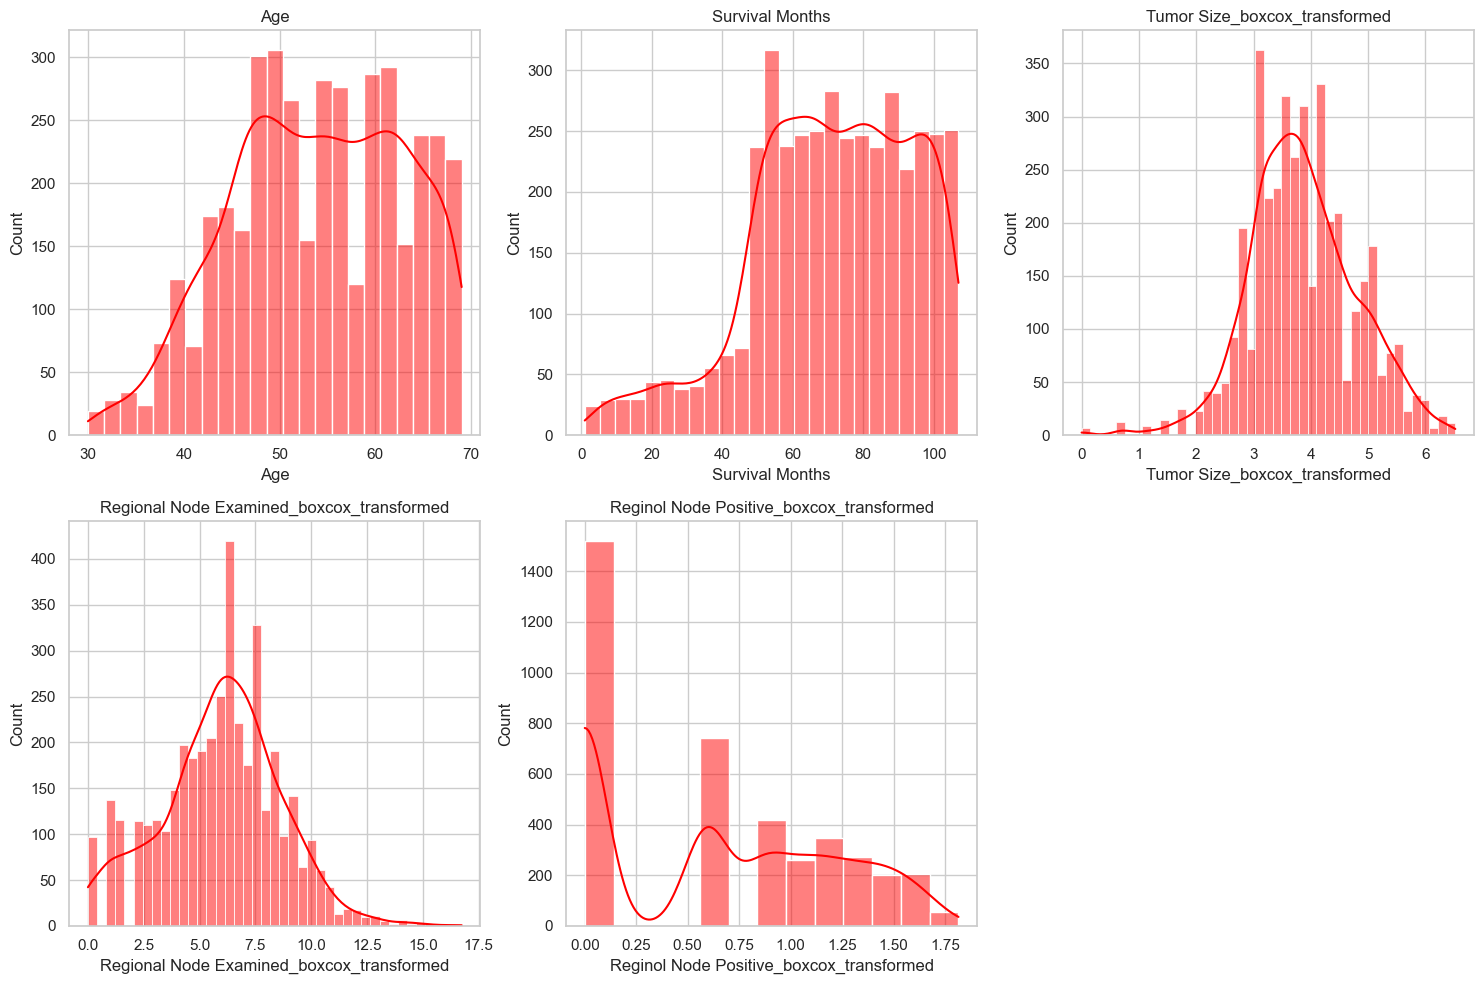

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(numerical.columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color = 'red')
    axes[i].set_title(col)

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [59]:
numerical.skew()

Age                                         -0.220
Survival Months                             -0.590
Tumor Size_boxcox_transformed                0.015
Regional Node Examined_boxcox_transformed   -0.035
Reginol Node Positive_boxcox_transformed     0.195
dtype: float64

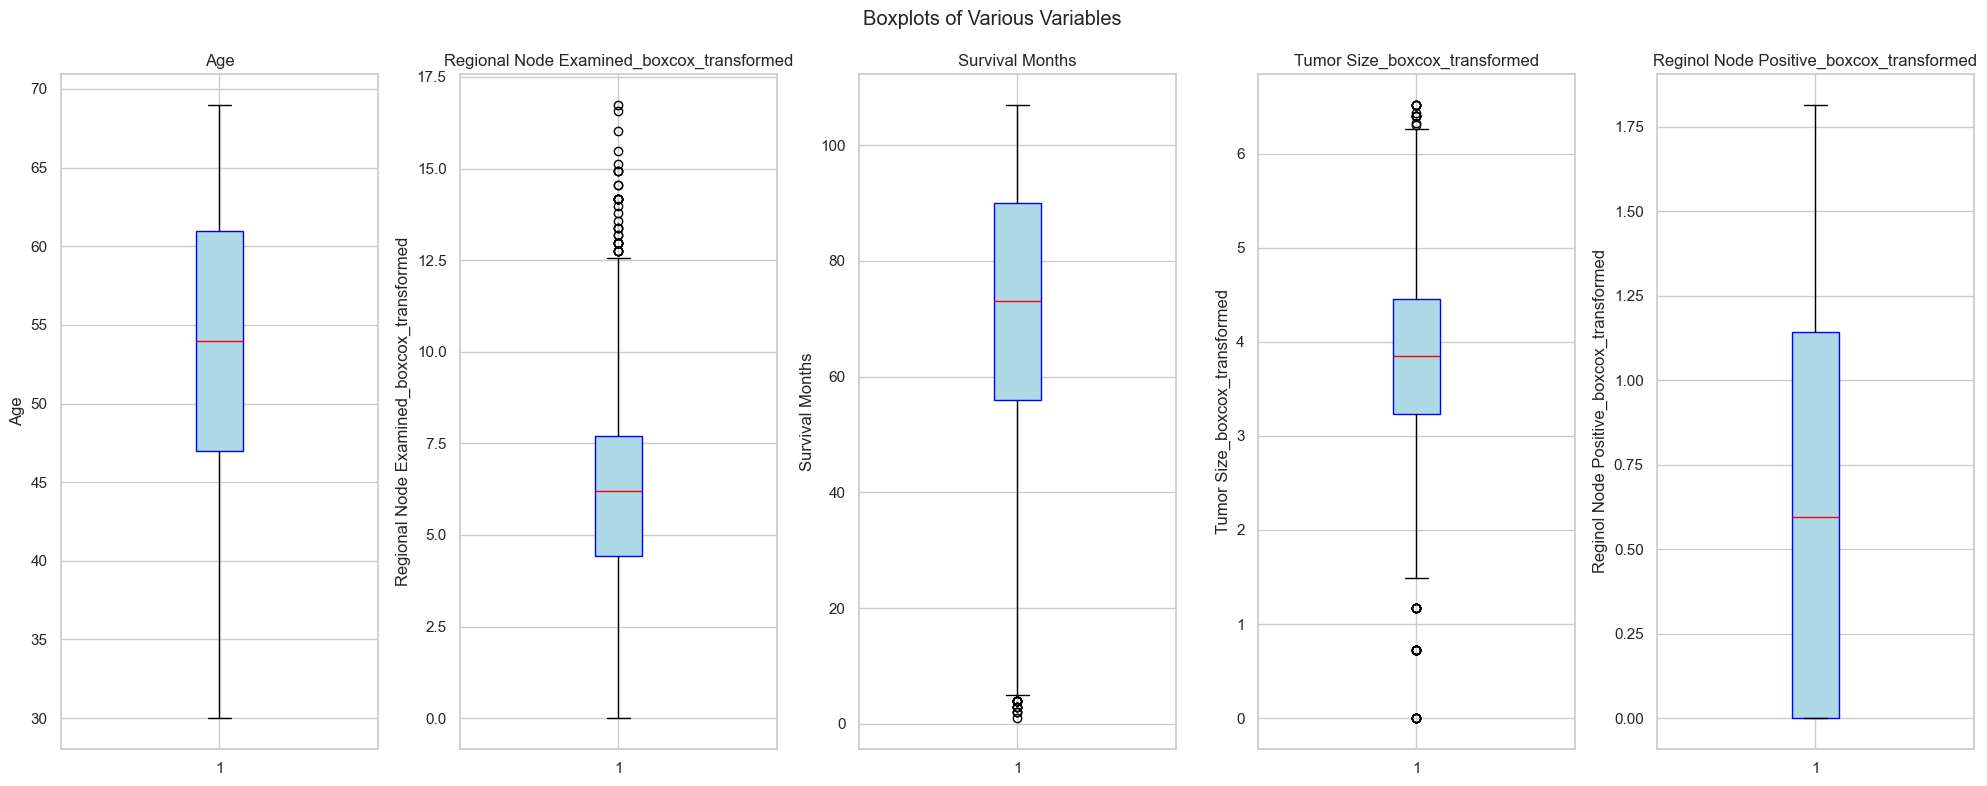

In [60]:
variables = ['Age', 'Regional Node Examined_boxcox_transformed', 'Survival Months', 
             'Tumor Size_boxcox_transformed', 'Reginol Node Positive_boxcox_transformed']

fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(20, 8))

for i, var in enumerate(variables):
    axes[i].boxplot(df[var], patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'),
                    medianprops=dict(color='red'))
    axes[i].set_title(var)
    axes[i].set_ylabel(var)

fig.suptitle('Boxplots of Various Variables')
plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

In [61]:
# def remove_outliers(df, columns):
#     q1 = df[columns].quantile(0.25)
#     q3 = df[columns].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
#     df = df[(df[columns] >= lower_bound) & (df[columns] <= upper_bound)]
#     return df

# # Remove outliers from features
# variables = ['Age', 'Regional Node Examined_boxcox_transformed', 'Survival Months', 
#              'Tumor Size_boxcox_transformed', 'Reginol Node Positive_boxcox_transformed']
# for col in variables:
#     df = remove_outliers(df, col)


In [62]:
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Survival Months,Status,Tumor Size_boxcox_transformed,Regional Node Examined_boxcox_transformed,Reginol Node Positive_boxcox_transformed
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,60,Alive,1.495,9.072,0.000
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,Positive,Positive,62,Alive,4.330,6.191,1.142
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,Positive,Positive,75,Alive,5.220,6.191,1.292
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,84,Alive,3.390,0.852,0.000
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,Positive,Positive,50,Alive,4.564,1.532,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,Positive,Positive,49,Alive,2.478,0.000,0.000
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,Positive,Positive,69,Alive,4.737,6.191,1.345
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,Positive,Negative,69,Alive,3.667,5.165,0.865
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,Positive,Positive,72,Alive,4.670,5.165,0.000


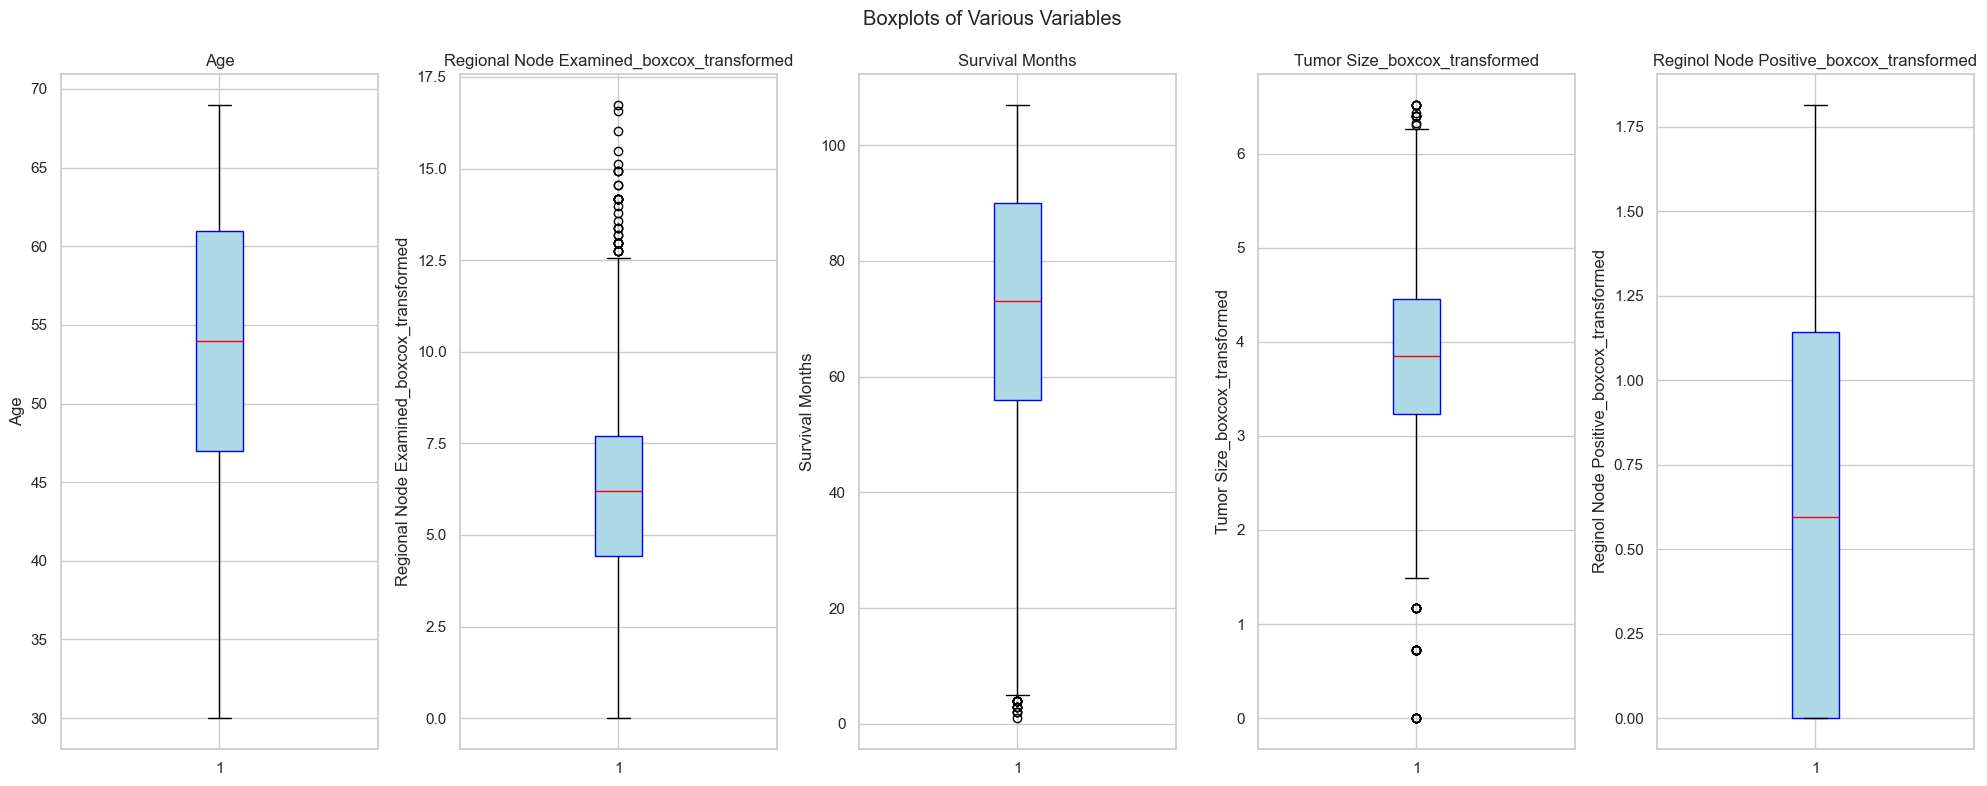

In [63]:
variables = ['Age', 'Regional Node Examined_boxcox_transformed', 'Survival Months', 
             'Tumor Size_boxcox_transformed', 'Reginol Node Positive_boxcox_transformed']

fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(20, 8))

for i, var in enumerate(variables):
    axes[i].boxplot(df[var], patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'),
                    medianprops=dict(color='red'))
    axes[i].set_title(var)
    axes[i].set_ylabel(var)

fig.suptitle('Boxplots of Various Variables')
plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

In [64]:
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Survival Months,Status,Tumor Size_boxcox_transformed,Regional Node Examined_boxcox_transformed,Reginol Node Positive_boxcox_transformed
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,60,Alive,1.495,9.072,0.000
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,Positive,Positive,62,Alive,4.330,6.191,1.142
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,Positive,Positive,75,Alive,5.220,6.191,1.292
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,84,Alive,3.390,0.852,0.000
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,Positive,Positive,50,Alive,4.564,1.532,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,Positive,Positive,49,Alive,2.478,0.000,0.000
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,Positive,Positive,69,Alive,4.737,6.191,1.345
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,Positive,Negative,69,Alive,3.667,5.165,0.865
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,Positive,Positive,72,Alive,4.670,5.165,0.000


In [65]:
categorical

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
0,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,Alive
1,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
2,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,Positive,Positive,Alive
3,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,Alive
4,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,Positive,Positive,Alive
...,...,...,...,...,...,...,...,...,...,...,...
4019,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
4020,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
4021,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,Positive,Negative,Alive
4022,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,Positive,Positive,Alive


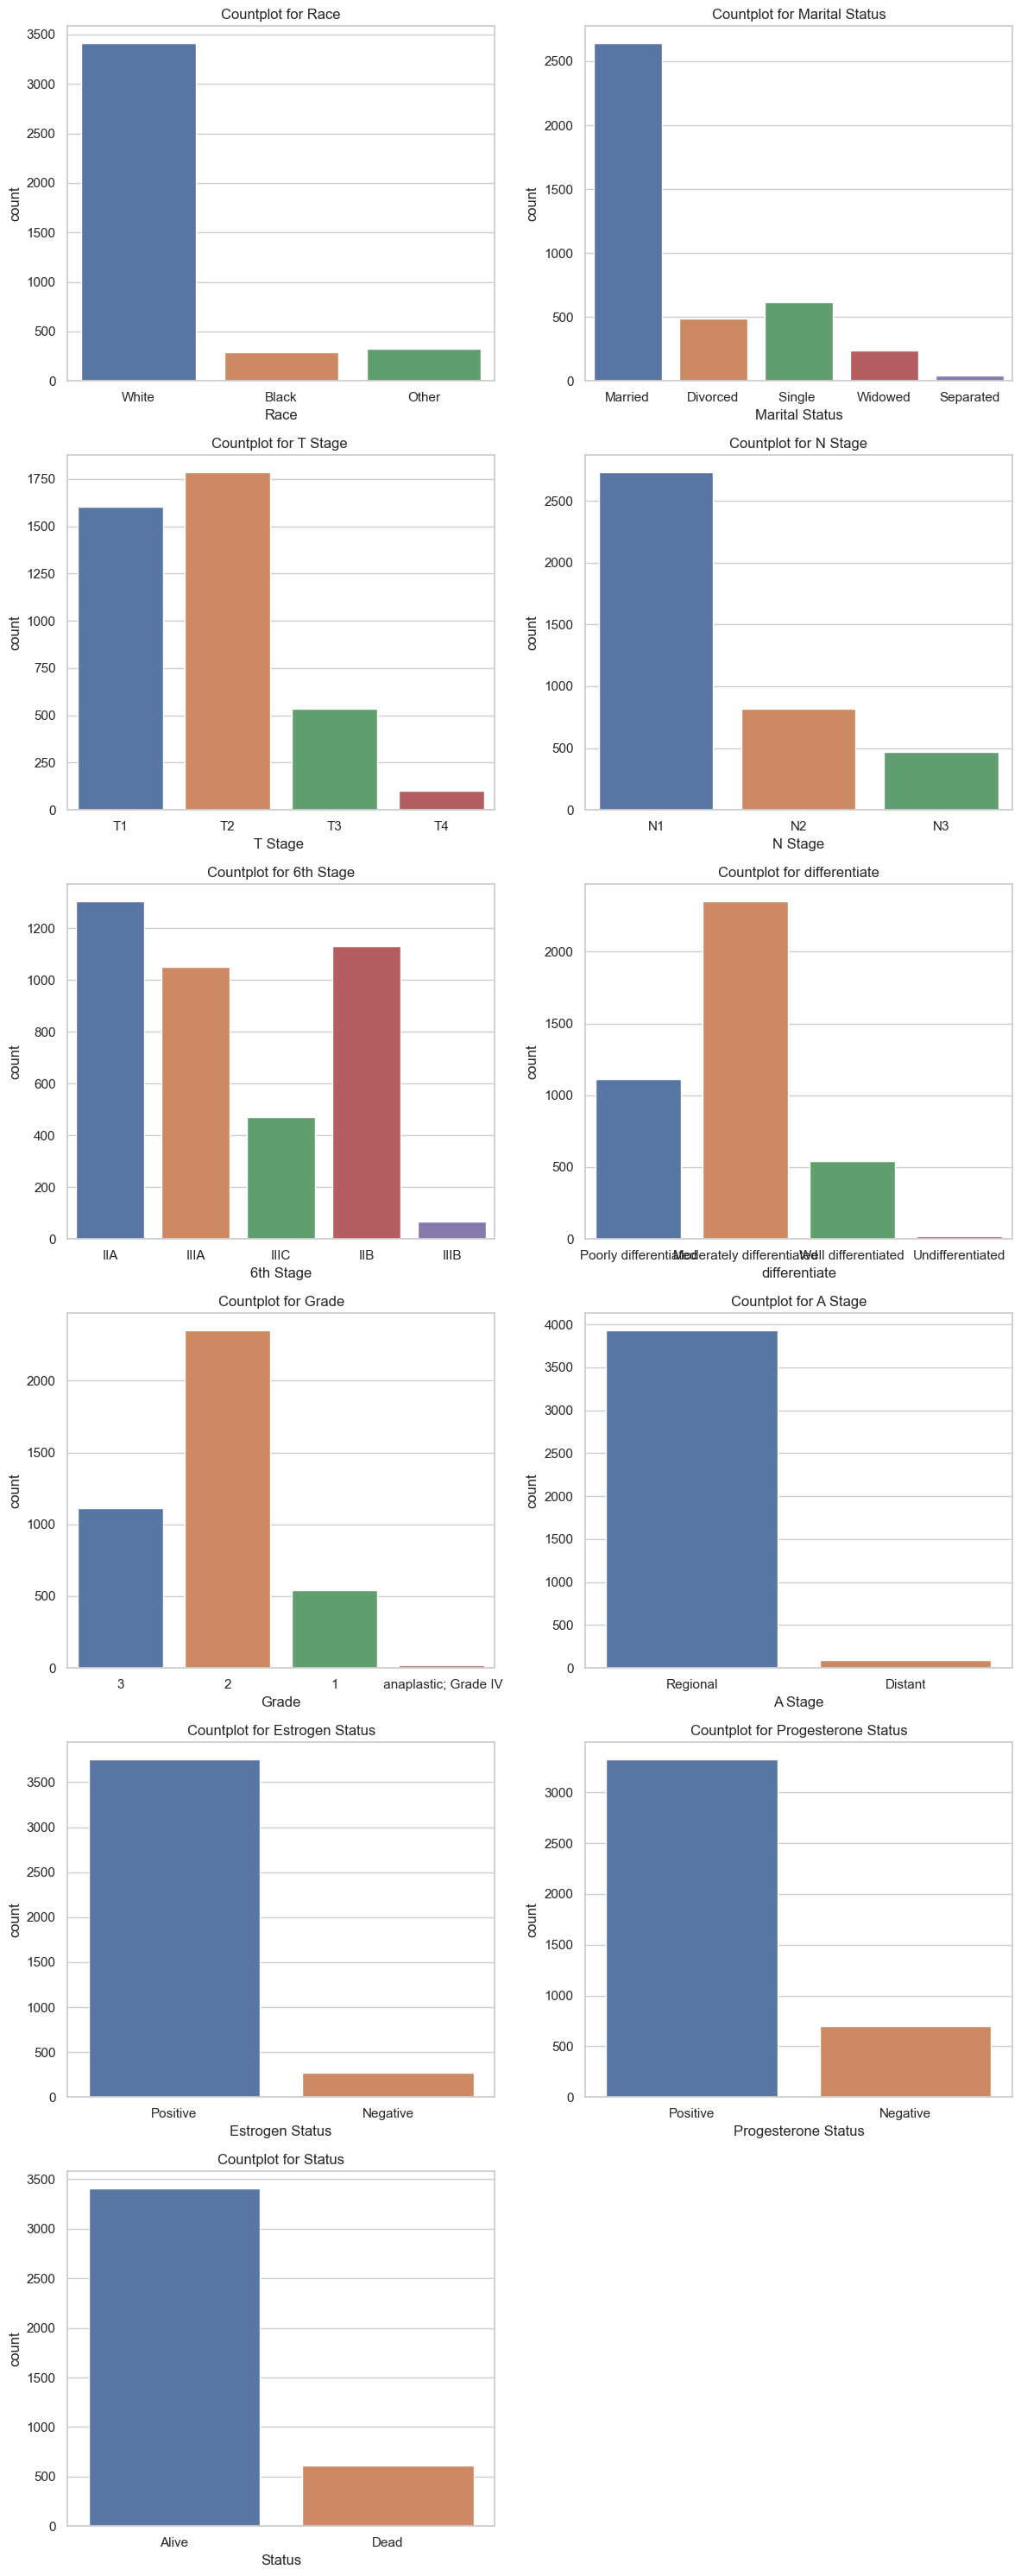

In [66]:
num_cols = len(categorical.columns)
num_rows = int(np.ceil(num_cols / 2))

fig, axs = plt.subplots(num_rows, 2, figsize=(12, num_rows * 5))
axs = axs.flatten()

for i, col in enumerate(categorical.columns):
    sns.countplot(x=col, data=categorical, ax=axs[i], hue = col)
    axs[i].set_title(f'Countplot for {col}')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()
plt.show()


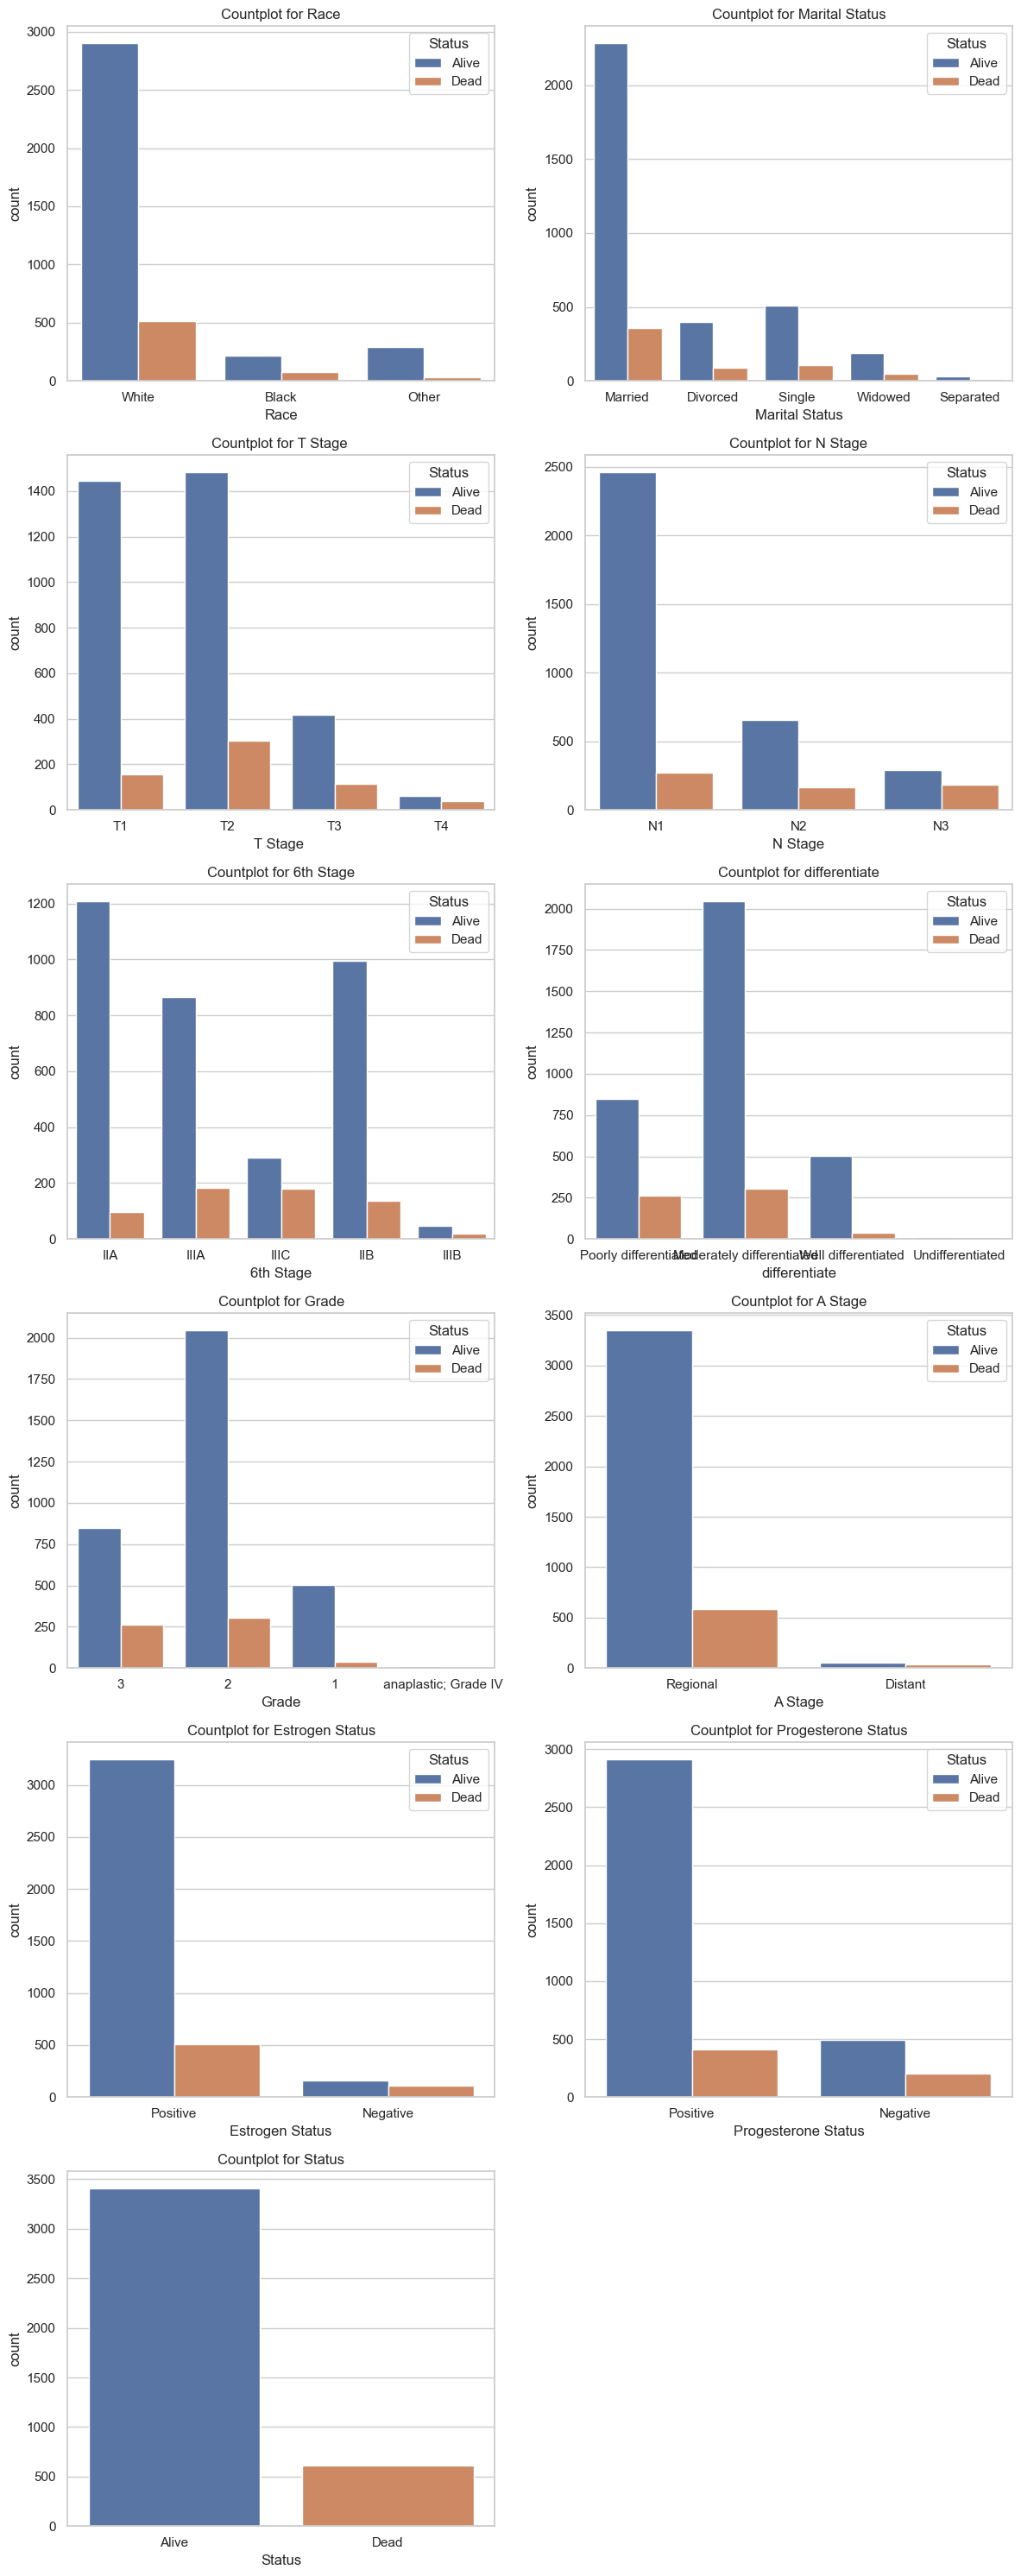

In [67]:
num_cols = len(categorical.columns)
num_rows = int(np.ceil(num_cols / 2))

fig, axs = plt.subplots(num_rows, 2, figsize=(12, num_rows * 5))
axs = axs.flatten()

for i, col in enumerate(categorical.columns):
    sns.countplot(x=col, data=categorical, ax=axs[i], hue = 'Status')
    axs[i].set_title(f'Countplot for {col}')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


In [68]:
# df.loc[df['Marital Status'] == 'Divorced', 'Marital Status'] = 'Separated'
# df.loc[df['Marital Status'] == 'Widowed', 'Marital Status'] = 'Separated'
# df.loc[df['Marital Status'] == 'Separated', 'Marital Status'] = 'Separated'

df.loc[df['differentiate'] == 'Well differentiated', 'differentiate'] = 'differentiated'
df.loc[df['differentiate'] == 'Moderately differentiated', 'differentiate'] = 'differentiated'
df.loc[df['differentiate'] == 'Poorly differentiated', 'differentiate'] = 'undifferentiated'
df.loc[df['differentiate'] == 'Undifferentiated', 'differentiate'] = 'undifferentiated'


In [69]:
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Survival Months,Status,Tumor Size_boxcox_transformed,Regional Node Examined_boxcox_transformed,Reginol Node Positive_boxcox_transformed
0,68,White,Married,T1,N1,IIA,undifferentiated,3,Regional,Positive,Positive,60,Alive,1.495,9.072,0.000
1,50,White,Married,T2,N2,IIIA,differentiated,2,Regional,Positive,Positive,62,Alive,4.330,6.191,1.142
2,58,White,Divorced,T3,N3,IIIC,differentiated,2,Regional,Positive,Positive,75,Alive,5.220,6.191,1.292
3,58,White,Married,T1,N1,IIA,undifferentiated,3,Regional,Positive,Positive,84,Alive,3.390,0.852,0.000
4,47,White,Married,T2,N1,IIB,undifferentiated,3,Regional,Positive,Positive,50,Alive,4.564,1.532,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,differentiated,2,Regional,Positive,Positive,49,Alive,2.478,0.000,0.000
4020,56,White,Divorced,T2,N2,IIIA,differentiated,2,Regional,Positive,Positive,69,Alive,4.737,6.191,1.345
4021,68,White,Married,T2,N1,IIB,differentiated,2,Regional,Positive,Negative,69,Alive,3.667,5.165,0.865
4022,58,Black,Divorced,T2,N1,IIB,differentiated,2,Regional,Positive,Positive,72,Alive,4.670,5.165,0.000


In [70]:
count_alive = categorical[categorical['Status'] == 'Alive']['Status'].count()
count_dead = categorical[categorical['Status'] == 'Dead']['Status'].count()


print(count_alive/(count_alive+count_dead))
print(count_dead/(count_alive+count_dead))


0.8468804374844643
0.15311956251553566


In [71]:
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Survival Months,Status,Tumor Size_boxcox_transformed,Regional Node Examined_boxcox_transformed,Reginol Node Positive_boxcox_transformed
0,68,White,Married,T1,N1,IIA,undifferentiated,3,Regional,Positive,Positive,60,Alive,1.495,9.072,0.000
1,50,White,Married,T2,N2,IIIA,differentiated,2,Regional,Positive,Positive,62,Alive,4.330,6.191,1.142
2,58,White,Divorced,T3,N3,IIIC,differentiated,2,Regional,Positive,Positive,75,Alive,5.220,6.191,1.292
3,58,White,Married,T1,N1,IIA,undifferentiated,3,Regional,Positive,Positive,84,Alive,3.390,0.852,0.000
4,47,White,Married,T2,N1,IIB,undifferentiated,3,Regional,Positive,Positive,50,Alive,4.564,1.532,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,differentiated,2,Regional,Positive,Positive,49,Alive,2.478,0.000,0.000
4020,56,White,Divorced,T2,N2,IIIA,differentiated,2,Regional,Positive,Positive,69,Alive,4.737,6.191,1.345
4021,68,White,Married,T2,N1,IIB,differentiated,2,Regional,Positive,Negative,69,Alive,3.667,5.165,0.865
4022,58,Black,Divorced,T2,N1,IIB,differentiated,2,Regional,Positive,Positive,72,Alive,4.670,5.165,0.000


In [72]:
df['Black_vs_NonBlack'] = df['Race'].apply(
    lambda x: 'Black' if x == 'Black' else 'Non-Black'
)

In [73]:
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Survival Months,Status,Tumor Size_boxcox_transformed,Regional Node Examined_boxcox_transformed,Reginol Node Positive_boxcox_transformed,Black_vs_NonBlack
0,68,White,Married,T1,N1,IIA,undifferentiated,3,Regional,Positive,Positive,60,Alive,1.495,9.072,0.000,Non-Black
1,50,White,Married,T2,N2,IIIA,differentiated,2,Regional,Positive,Positive,62,Alive,4.330,6.191,1.142,Non-Black
2,58,White,Divorced,T3,N3,IIIC,differentiated,2,Regional,Positive,Positive,75,Alive,5.220,6.191,1.292,Non-Black
3,58,White,Married,T1,N1,IIA,undifferentiated,3,Regional,Positive,Positive,84,Alive,3.390,0.852,0.000,Non-Black
4,47,White,Married,T2,N1,IIB,undifferentiated,3,Regional,Positive,Positive,50,Alive,4.564,1.532,0.000,Non-Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,differentiated,2,Regional,Positive,Positive,49,Alive,2.478,0.000,0.000,Non-Black
4020,56,White,Divorced,T2,N2,IIIA,differentiated,2,Regional,Positive,Positive,69,Alive,4.737,6.191,1.345,Non-Black
4021,68,White,Married,T2,N1,IIB,differentiated,2,Regional,Positive,Negative,69,Alive,3.667,5.165,0.865,Non-Black
4022,58,Black,Divorced,T2,N1,IIB,differentiated,2,Regional,Positive,Positive,72,Alive,4.670,5.165,0.000,Black


In [76]:
from scipy.stats import chi2_contingency

survival_by_black_nonblack = df.groupby(['Black_vs_NonBlack', 'Status']).size().unstack()

survival_proportions_black_nonblack = survival_by_black_nonblack.div(survival_by_black_nonblack.sum(axis=1), axis=0)

chi2_table_black_nonblack = survival_by_black_nonblack.fillna(0)  
chi2_stat_black_nonblack, p_value_black_nonblack, _, _ = chi2_contingency(chi2_table_black_nonblack)

survival_proportions_black_nonblack, p_value_black_nonblack


(Status             Alive  Dead
 Black_vs_NonBlack             
 Black              0.749 0.251
 Non-Black          0.855 0.145,
 np.float64(2.327132978195018e-06))

### highly significant p-value for Black women

In [31]:
df['Status'] = df['Status'].map({'Alive': 0, 'Dead': 1})


In [32]:
for col in categorical.columns:
    if df[col].nunique() >2:
        print(col, df[col].nunique())

Race 3
Marital Status 5
T Stage  4
N Stage 3
6th Stage 5
Grade 4


In [33]:
df = df.drop('Grade', axis = 1)

In [34]:
df = pd.get_dummies(df, columns=['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 
                                             'differentiate', 'A Stage', 'Estrogen Status', 
                                             'Progesterone Status'], drop_first=True)

In [35]:
df.head()

,Age,Survival Months,Status,Tumor Size_boxcox_transformed,Regional Node Examined_boxcox_transformed,Reginol Node Positive_boxcox_transformed,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed,T Stage _T2,T Stage _T3,T Stage _T4,N Stage_N2,N Stage_N3,6th Stage_IIB,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,differentiate_undifferentiated,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive
0,68,60,0,1.494931,9.072114,0.000000,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
1,50,62,0,4.330361,6.191317,1.141745,False,True,True,False,False,False,True,False,False,True,False,False,True,False,False,False,True,True,True
2,58,75,0,5.219597,6.191317,1.291963,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,True,True
3,58,84,0,3.389821,0.851580,0.000000,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
4,47,50,0,4.564231,1.531745,0.000000,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,True,True,True,True


In [36]:
not_int_columns = ['Tumor Size_boxcox_transformed', 'Regional Node Examined_boxcox_transformed', 'Reginol Node Positive_boxcox_transformed']

df = df.apply(lambda x: x if x.name in not_int_columns else x.astype(int))

In [37]:
df.head()

,Age,Survival Months,Status,Tumor Size_boxcox_transformed,Regional Node Examined_boxcox_transformed,Reginol Node Positive_boxcox_transformed,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed,T Stage _T2,T Stage _T3,T Stage _T4,N Stage_N2,N Stage_N3,6th Stage_IIB,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,differentiate_undifferentiated,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive
0,68,60,0,1.494931,9.072114,0.000000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
1,50,62,0,4.330361,6.191317,1.141745,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,1
2,58,75,0,5.219597,6.191317,1.291963,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,1
3,58,84,0,3.389821,0.851580,0.000000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
4,47,50,0,4.564231,1.531745,0.000000,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1


<Axes: >

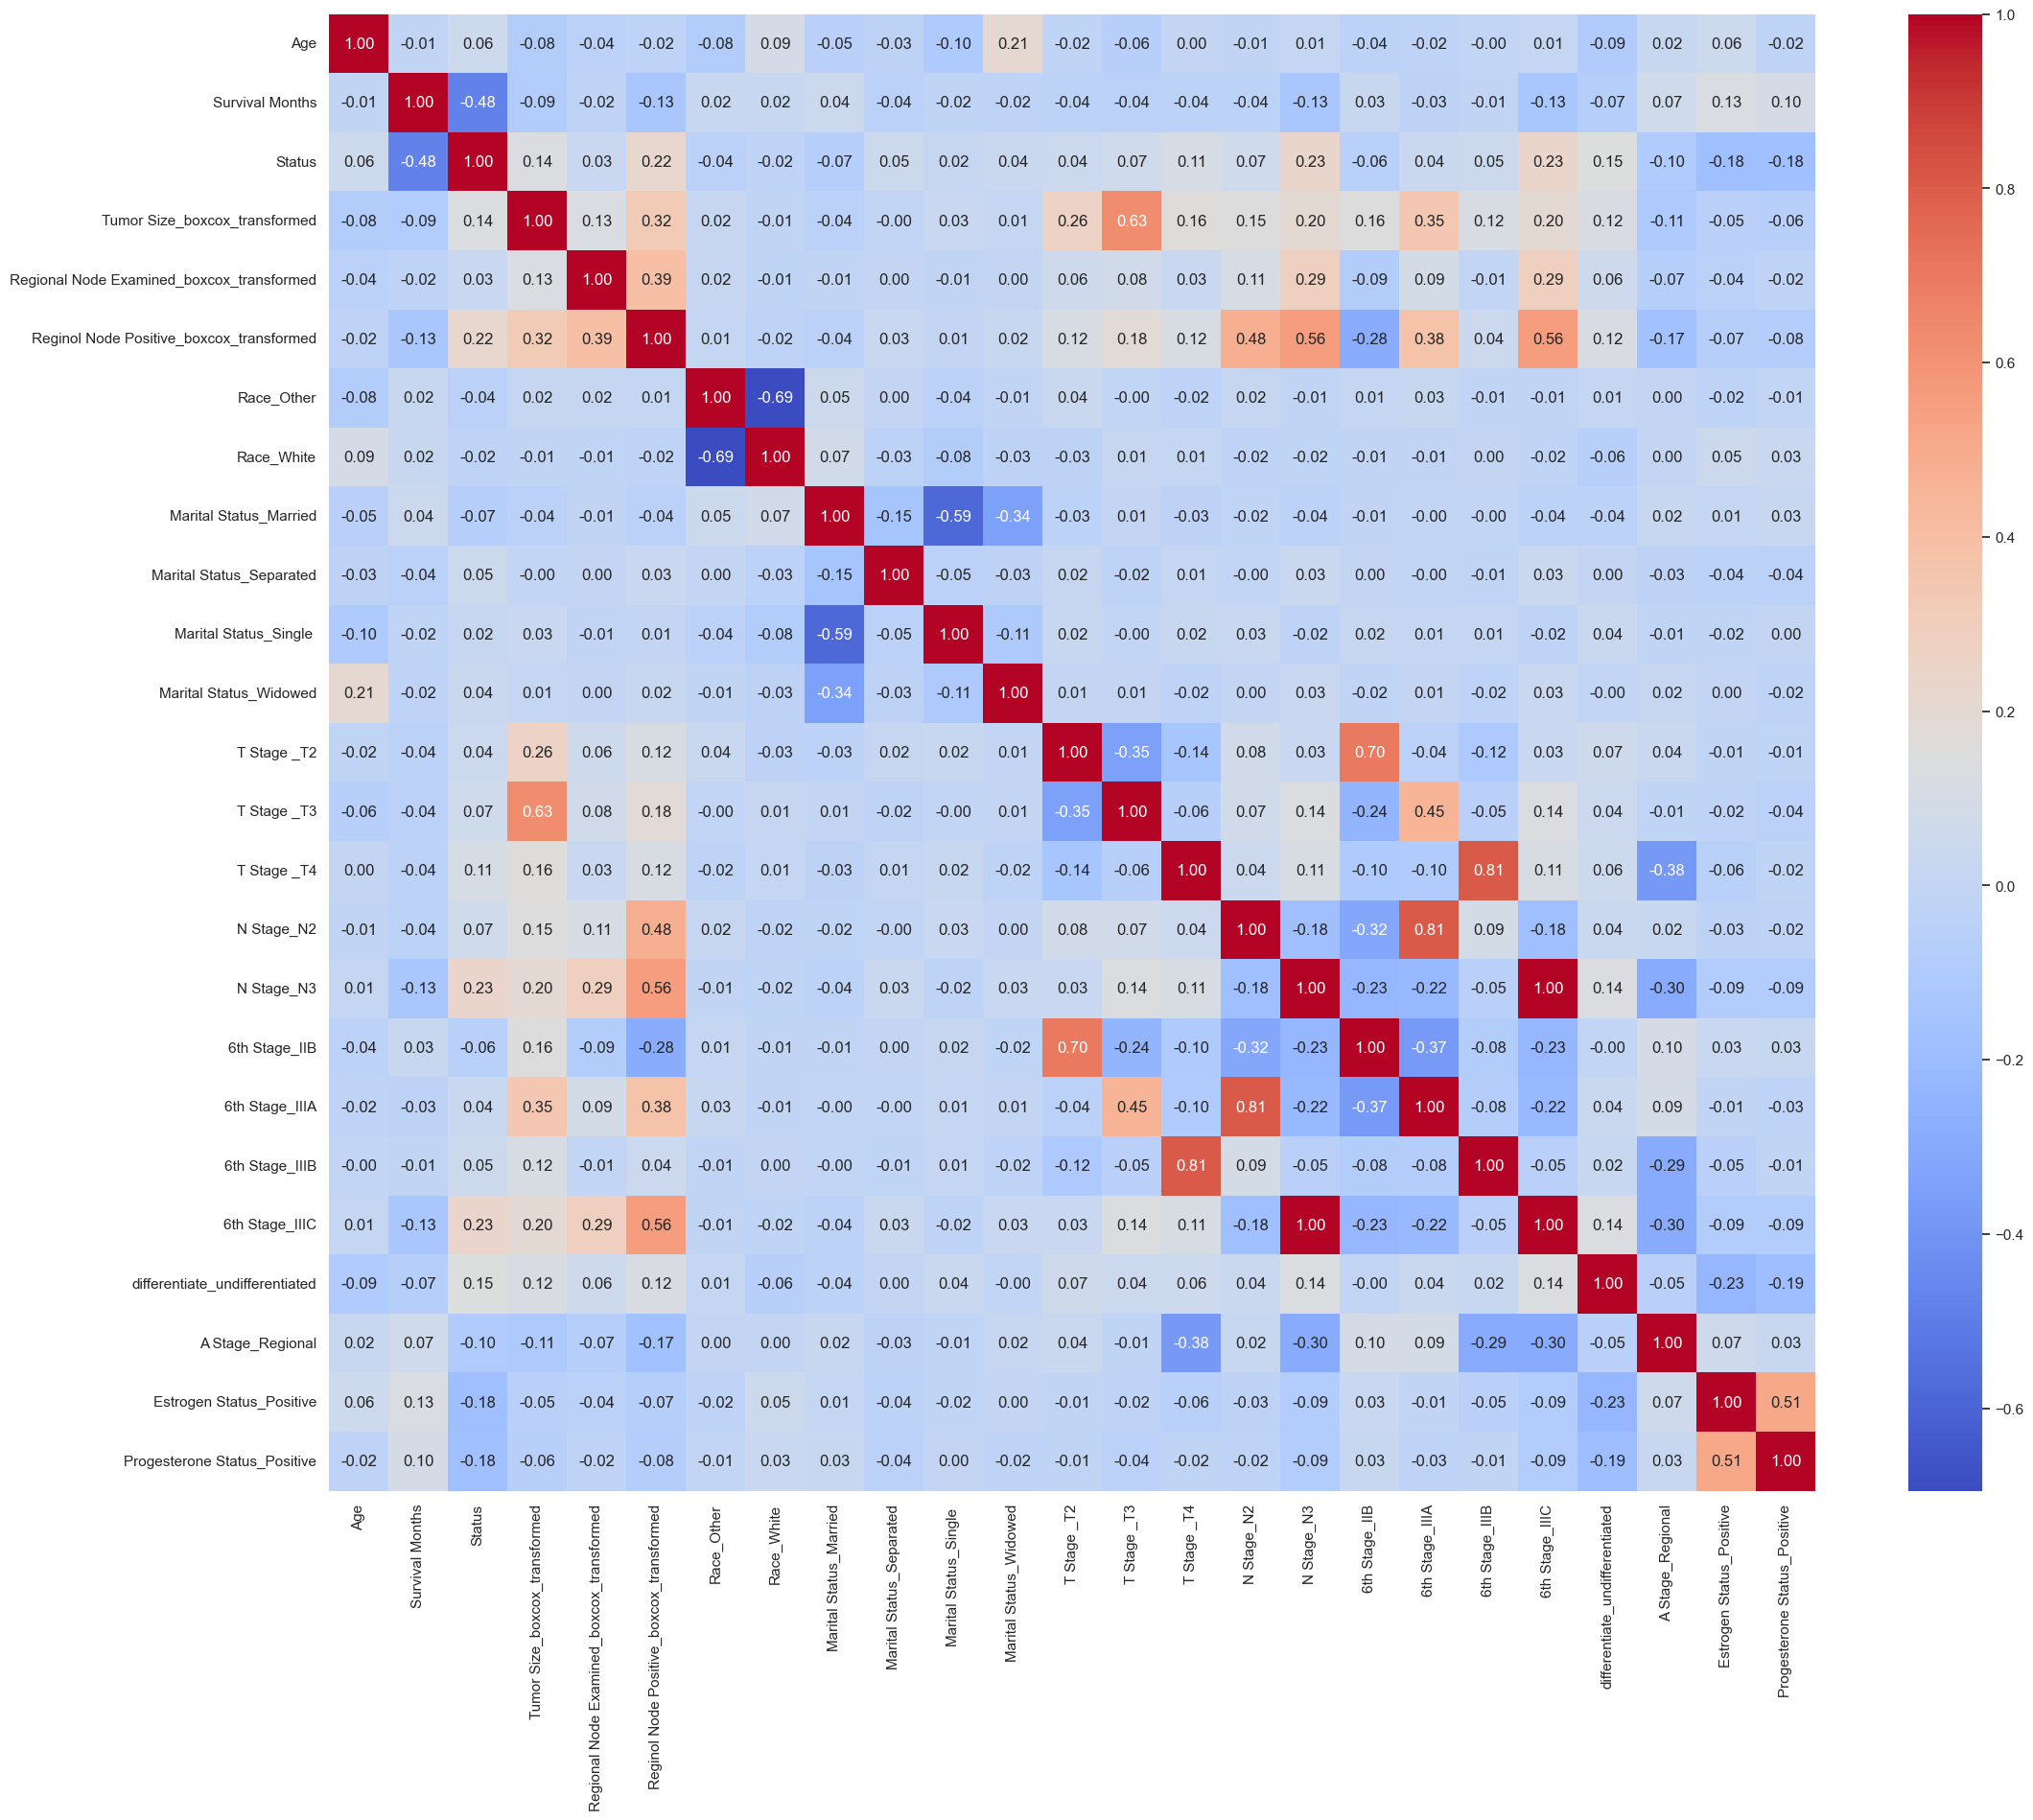

In [38]:
plt.figure(figsize=(25,20))

sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')

In [39]:
df['N_Stage_N3_6th_Stage_IIIC'] = df['6th Stage_IIIC'] * df['N Stage_N3']
df = df.drop(['6th Stage_IIIC', 'N Stage_N3'], axis = 1)

<Axes: >

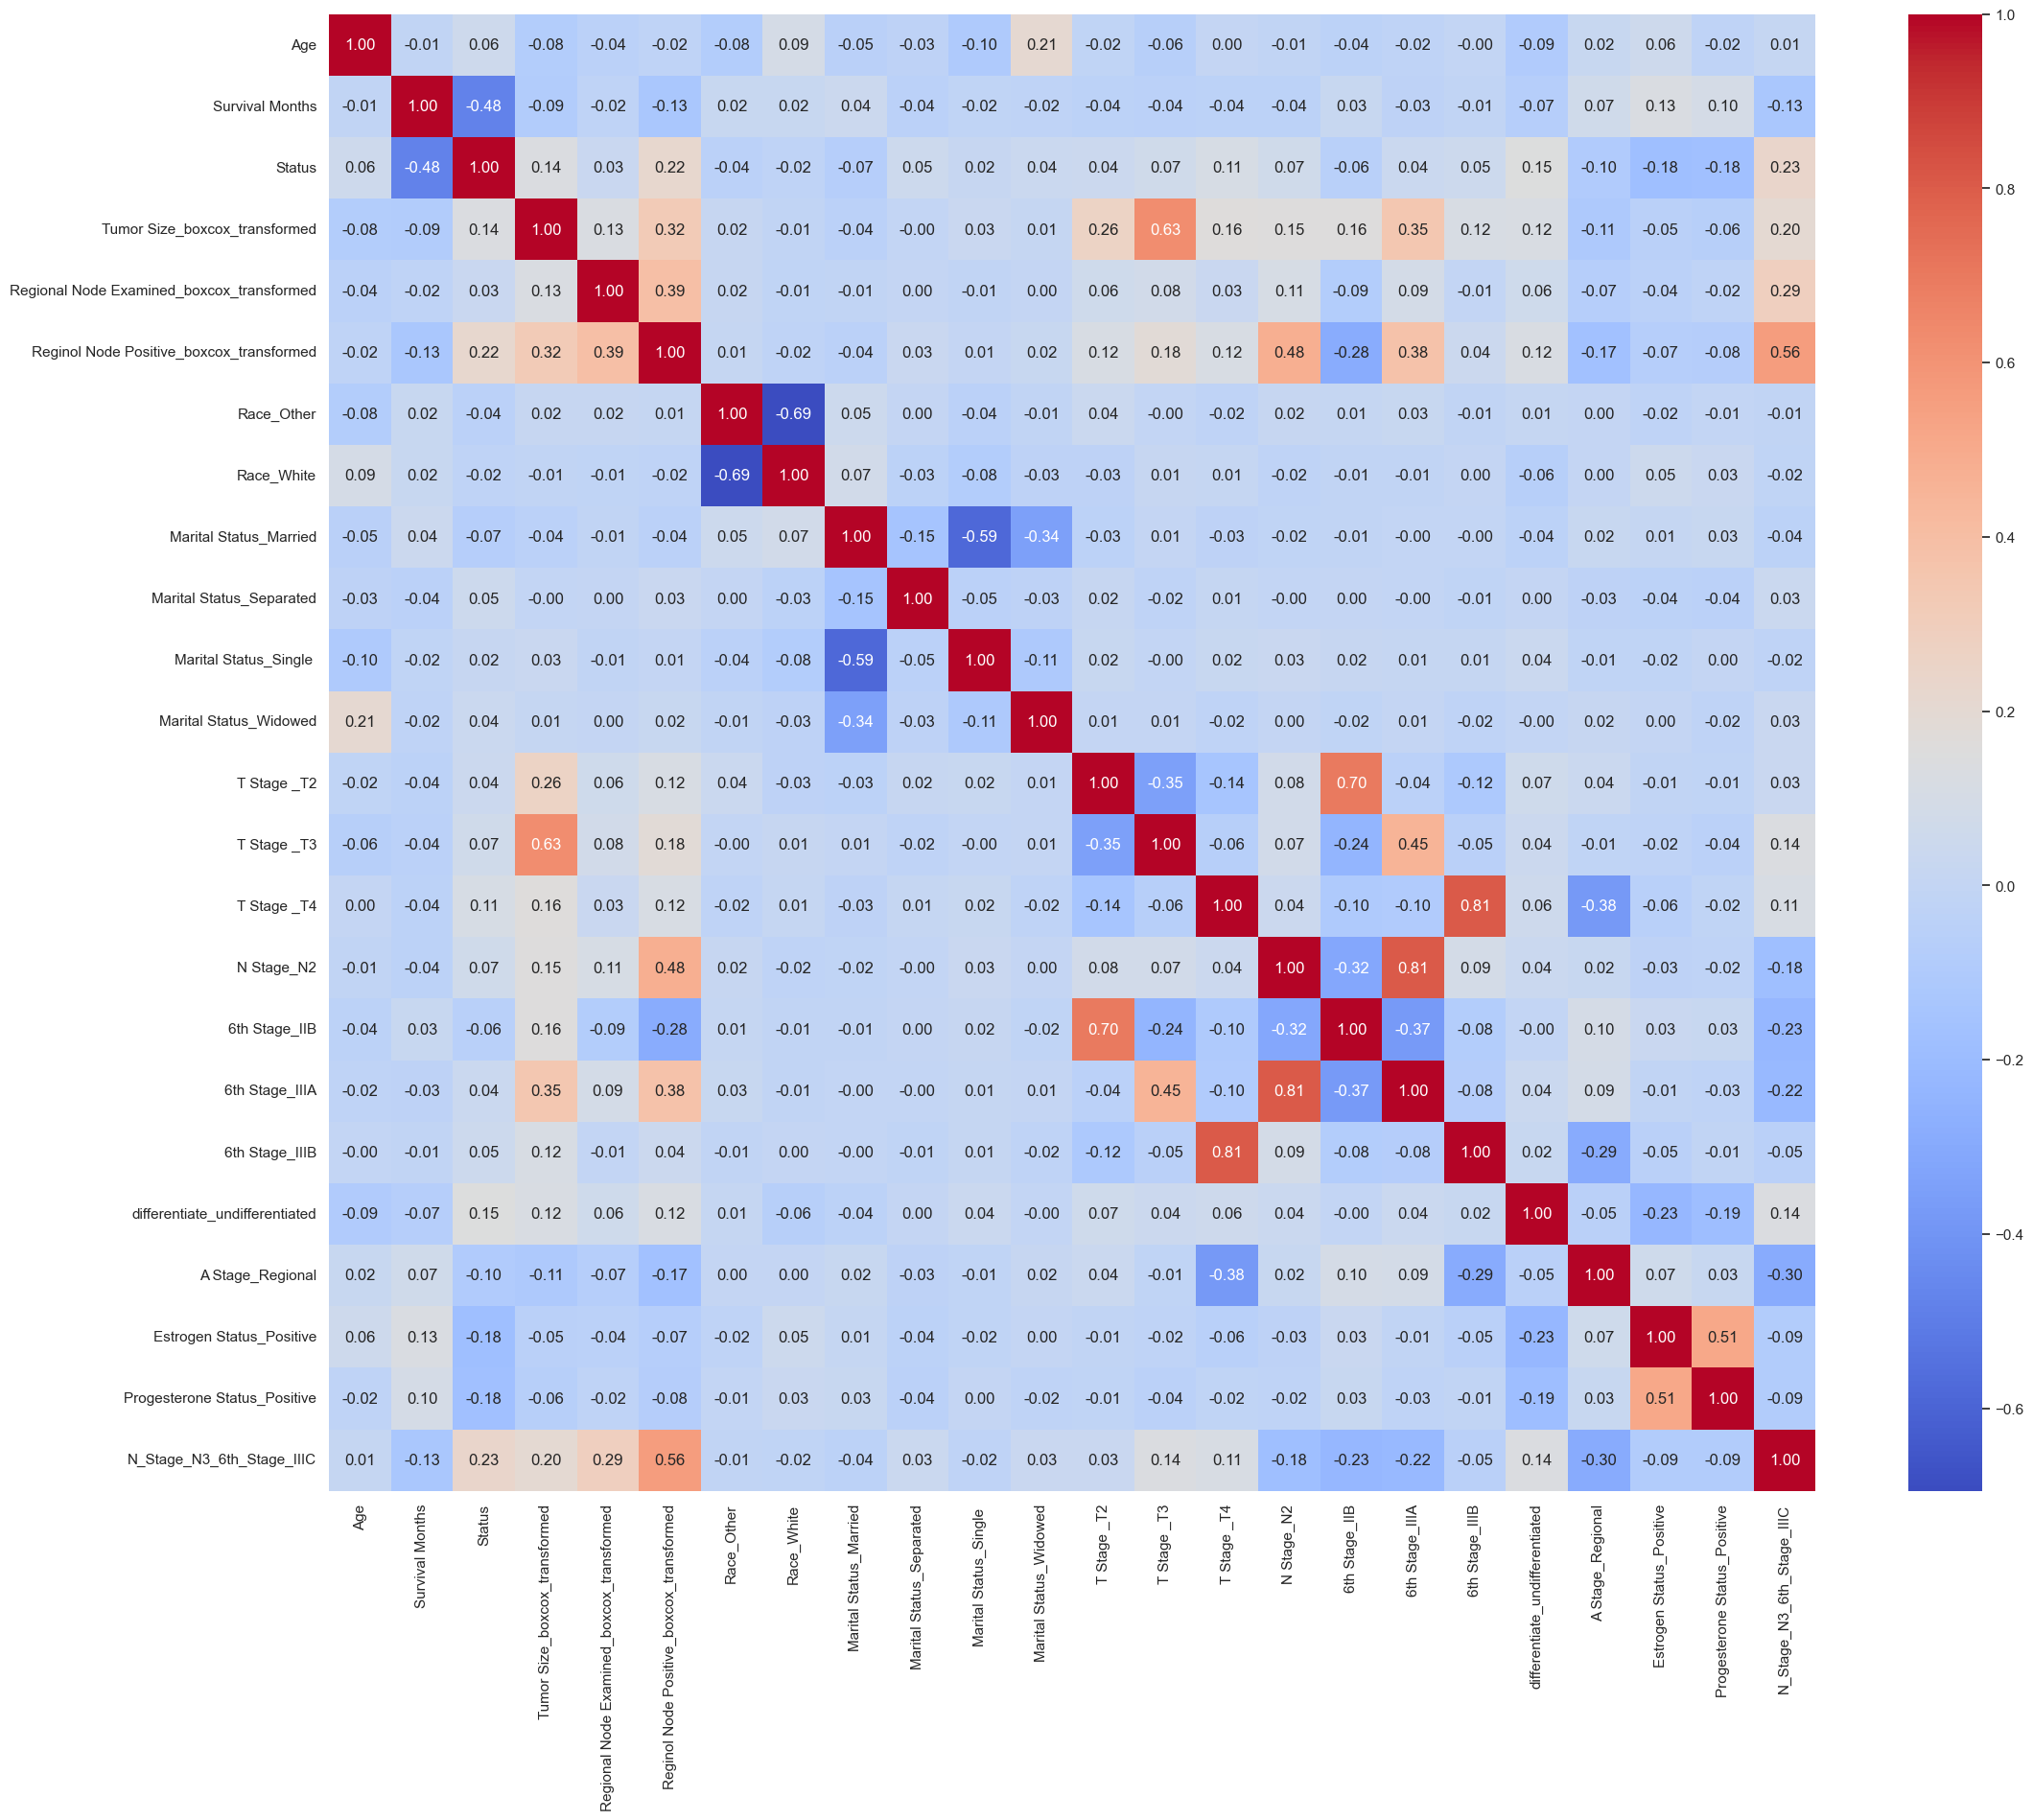

In [40]:
plt.figure(figsize=(25,20))

sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')

In [41]:
def check_multicollinearity(X):
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    X_with_const = sm.add_constant(X)

    vif_data = pd.DataFrame()
    vif_data["feature"] = X_with_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
    
    print(vif_data)
    
       

In [42]:
X = df.drop(['Status', 'T Stage _T2', '6th Stage_IIIA'], axis = 1)
y = df['Status']
check_multicollinearity(X)

                                      feature     VIF
0                                       const 178.534
1                                         Age   1.094
2                             Survival Months   1.046
3               Tumor Size_boxcox_transformed   2.951
4   Regional Node Examined_boxcox_transformed   1.202
5    Reginol Node Positive_boxcox_transformed   3.311
6                                  Race_Other   1.998
7                                  Race_White   2.019
8                      Marital Status_Married   2.235
9                    Marital Status_Separated   1.091
10                     Marital Status_Single    1.957
11                     Marital Status_Widowed   1.432
12                                T Stage _T3   2.553
13                                T Stage _T4   3.319
14                                 N Stage_N2   2.635
15                              6th Stage_IIB   2.040
16                             6th Stage_IIIB   3.069
17             differentiate

In [43]:
df.to_csv('./hiii/final_breast_cancer.csv', index=False)

In [42]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

coefficients = result.params
standard_errors = result.bse

wald_stats = (coefficients / standard_errors) ** 2

p_values = 1 - stats.chi2.cdf(wald_stats, df=1)

results_df = pd.DataFrame({
    'Coefficient': coefficients,
    'Std Error': standard_errors,
    'Wald Statistic': wald_stats,
    'p-value': p_values
})

results_df


Optimization terminated successfully.
         Current function value: 0.280185
         Iterations 7


,Coefficient,Std Error,Wald Statistic,p-value
const,0.958,0.665,2.076,0.150
Age,0.029,0.006,19.930,0.000
Survival Months,-0.061,0.003,499.557,0.000
Tumor Size_boxcox_transformed,0.004,0.094,0.002,0.963
Regional Node Examined_boxcox_transformed,-0.076,0.023,10.753,0.001
Reginol Node Positive_boxcox_transformed,0.518,0.183,7.973,0.005
Race_Other,-0.867,0.289,8.989,0.003
Race_White,-0.429,0.190,5.133,0.023
Marital Status_Married,-0.172,0.166,1.083,0.298
Marital Status_Separated,0.475,0.477,0.990,0.320


In [ ]:
best model: {'best_roc_auc': np.float64(0.8573823815240381), 'best_degree': 1, 'interaction_only': True, 'best_C': 0.01, 'best_penalty': 'l2', 'best_solver': 'saga', 'f1_mean': np.float64(0.7004019383207292), 'accuracy': np.float64(0.7970801648574911)}
(base) ➜  hiii /usr/bin/python3 /Users/arya/PersonalProjects/LogisticRegression/hiii/logistic_regression_grid_search.py
best model: {'best_roc_auc': np.float64(0.8720803706097824), 'best_degree': 1, 'interaction_only': True, 'best_C': 100, 'best_penalty': 'l2', 'best_solver': 'liblinear', 'f1_mean': np.float64(0.7866543204045663), 'accuracy': np.float64(0.7867889908256881)}




